In [2]:
# Step1: Importing libraries and reading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import seaborn as sns
from google.colab import files

uploaded = files.upload()
with zipfile.ZipFile('netflix_titles.csv.zip' , 'r') as zip_ref:
    zip_ref.extractall()
print('Files in directory' , os.listdir())
# reading data/CSV file


df = pd.read_csv('netflix_titles.csv')
df

Saving netflix_titles.csv.zip to netflix_titles.csv.zip
Files in directory ['.config', 'netflix_titles.csv.zip', 'netflix_titles.csv', 'sample_data']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# Step2: Providing the basic info
df.shape
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Step3: Cleaning the data
df_copy  = df.copy()
df_copy['director'].fillna('Missing' , inplace  =True)
df_copy['cast'].fillna('Missing' , inplace = True)
df_copy['country'].fillna('Missing' , inplace = True)
df_copy['rating'].fillna('Missing' , inplace = True)
df_copy['duration'].fillna('Missing' , inplace = True)

# Step4: Feature Engineering
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'] , errors = 'coerce')
df_copy['date_added'].dtype

df_copy['year_added'] = df_copy['date_added'].dt.year
df_copy['month_added'] = df_copy['date_added'].dt.month
df_copy['dt_added'] = df_copy['date_added'].dt.day


print(df_copy.isnull().sum())
print(df.dtypes)


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      98
month_added     98
dt_added        98
dtype: int64
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


/tmp/ipython-input-7-266837789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['director'].fillna('Missing' , inplace  =True)
/tmp/ipython-input-7-266837789.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Step5: Getting info  of categorical columns
df_copy.describe(include = 'object')
df_copy.describe()
df_copy.describe(include = 'object')


,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,18,221,514,8775
top,s8807,Movie,Zubaan,Missing,Missing,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,3207,1793,362,4


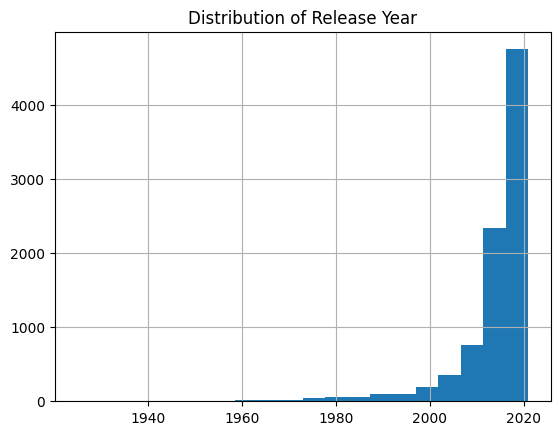

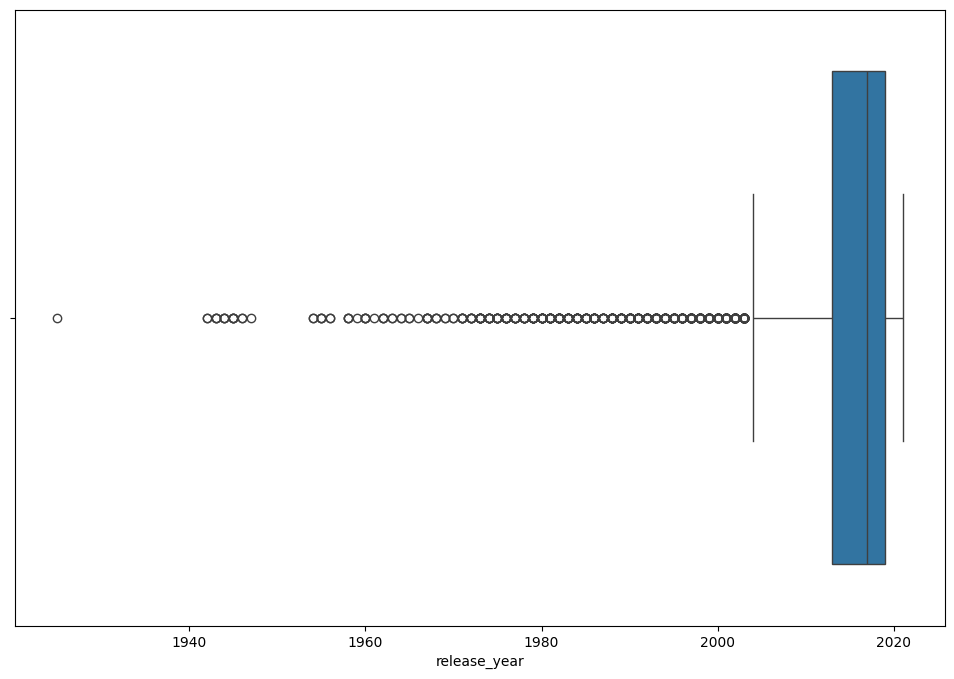

In [ ]:
# Step6 : Extracting the numerical and categorical columns
numerical_cols = [ cols for cols in df_copy.columns if df_copy[cols].dtype == 'int64']
numerical_cols

categorical_cols = [cols for cols in df_copy.columns if df_copy[cols].dtype != 'int64']
categorical_cols

# Step7 : Single/univariate analysis by plotting

# Histogram
df_copy[numerical_cols].hist(bins = 20)
plt.title('Distribution of Release Year')
plt.show()

fig = plt.figure(figsize = (12,8))
# Boxplots (to detect outliers)
sns.boxplot(x = df_copy['release_year'] )
plt.show()



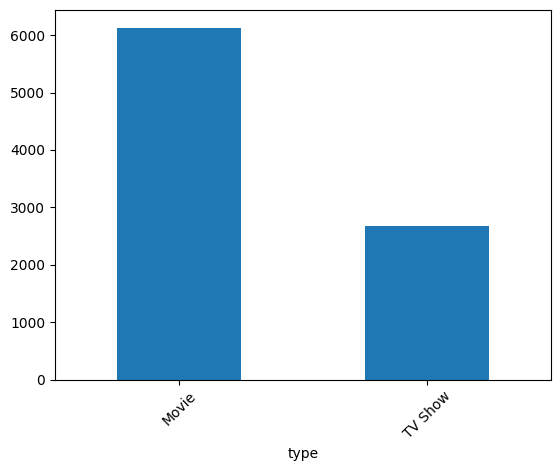

In [ ]:
# Categorical univariate analysis
# Bar plot
top_categroies = df_copy['type'].value_counts().head(10)
top_categroies.plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()


<Axes: xlabel='release_year', ylabel='rating'>

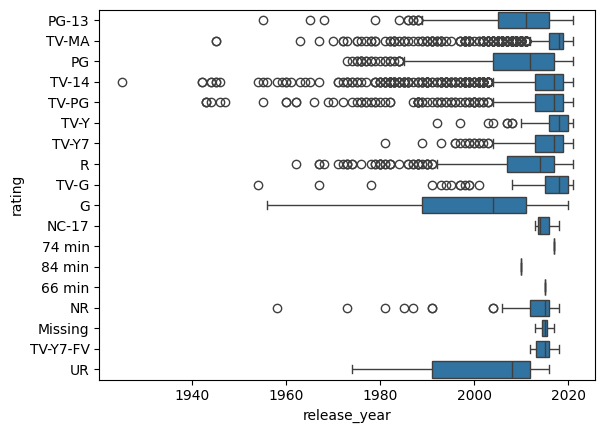

In [ ]:
# Bivariate analysis
# Numerical_col vs categorical_col

sns.boxplot(x = 'release_year' , y = 'rating' , data = df)

<Axes: xlabel='count', ylabel='Count'>

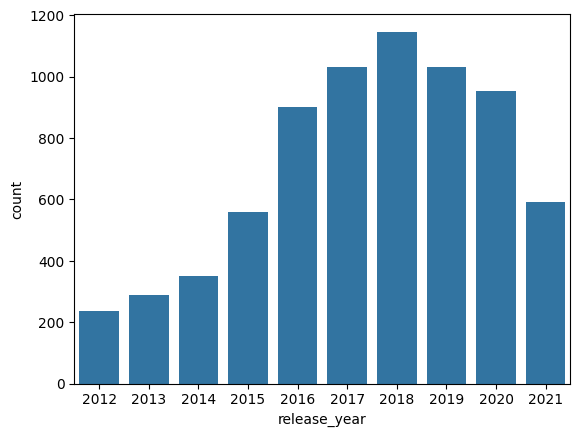

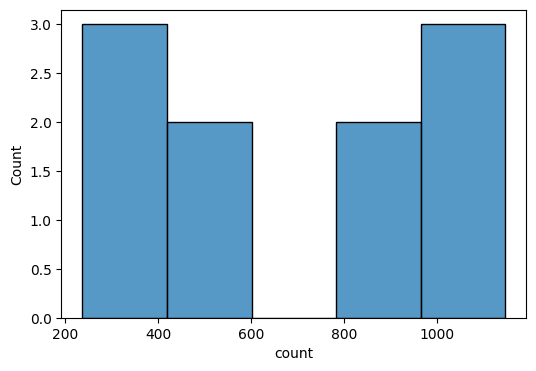

In [ ]:
# Step8 : Asking the questions and answering them through visualized plots

# How has content grown over years on netflix
# Bar plot and histogram
s = df_copy['release_year'].value_counts().head(10)
sns.barplot(s)
figure = plt.figure(figsize = (6,4))
sns.histplot(s)

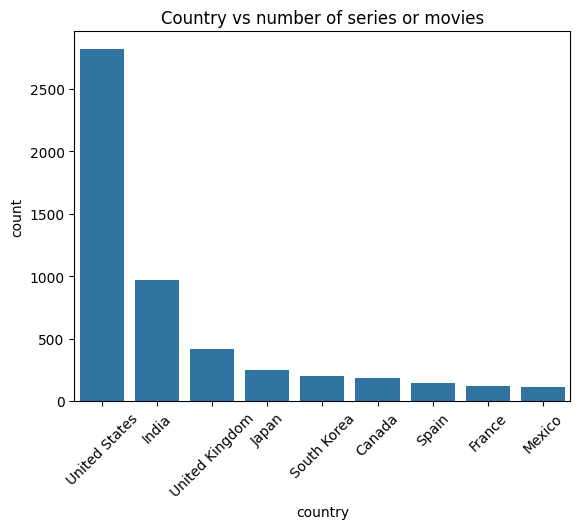

In [9]:
# Which countries produce the most netflix content
# Bar plot
t = df_copy['country'].value_counts().head(10)
t = t.drop("Missing")
sns.barplot(t)
plt.title('Country vs number of series or movies')
plt.xticks(rotation = 45)
plt.show()

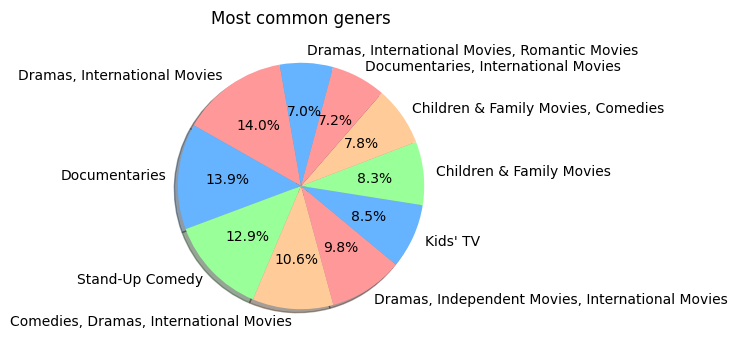

In [ ]:
# what are the most common genres
# Pie chart
u = df_copy['listed_in'].value_counts().head(10)
figure = plt.figure(figsize = (6,4))
plt.pie(u , labels = u.index , autopct = '%1.1f%%' , colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] ,  startangle = 100, shadow = True)
plt.title("Most common geners")
plt.show()

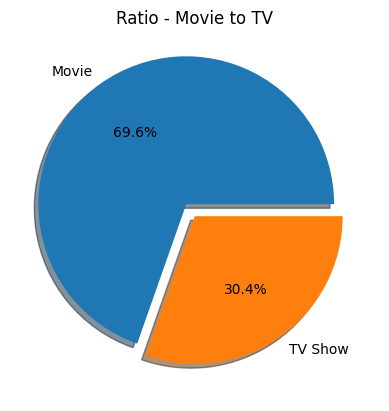

In [ ]:
# what is the ratio of TV shows to movies
# Pie chart
v = df_copy['type'].value_counts()
plt.pie(v , labels = v.index , autopct = '%1.1f%%' , explode = (0.1 ,0) , shadow = True )
plt.title('Ratio - Movie to TV')
plt.show()

<Axes: ylabel='count'>

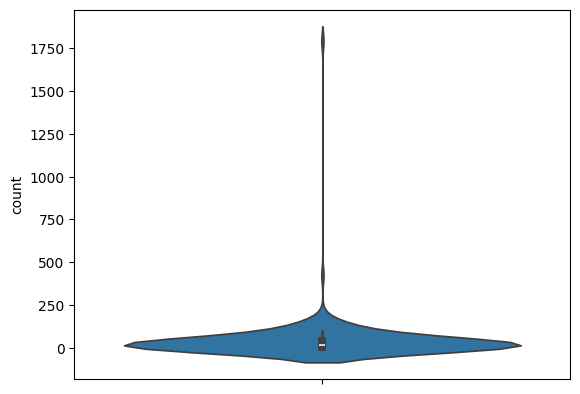

In [ ]:
# How long are the most TV shows seasons or movie runtimes
# Violinplot
v= df_copy['duration'].value_counts(ascending=False)
sns.violinplot(v)

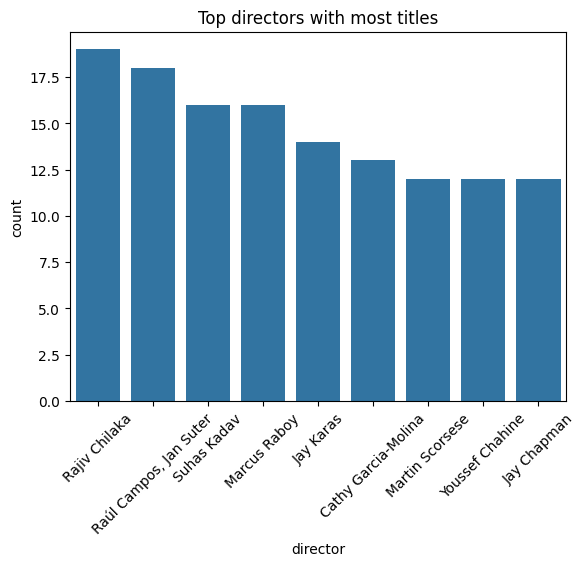

In [ ]:
# top directors with the most titles on netflix
# Bar plot
w = df_copy['director'].value_counts().head(10)
w = w.drop("Missing")
# sns.scatterplot(x = df_copy['director'] , y = df_copy['title'])
sns.barplot(w)
plt.title('Top directors with most titles')
plt.xticks(rotation = 45)
plt.show()

## 📌 Conclusions & Insights

After exploring and analyzing the Netflix dataset, here are some key insights:

1. 📈 **Content additions peaked around 2018–2019**, likely due to Netflix's global expansion and increased production before the COVID-19 slowdown.

2. 🌍 **The United States produces the most Netflix content**, followed by India, the United Kingdom, and Canada — indicating the platform's heavy focus on English-speaking regions.

3. 🧾 **Documentaries, Comedies, and Dramas** are the most frequent genres, showing user preference for engaging and informative content.

4. ⏳ **Movies to TV ratio**, tells that Movies exists more than TV show on Netflix.

5. 📆 **Most shows are ranging between 40 to 250 minutes**, but outliers shows that a few shows/seasons touching 1750 mins showing that netflix provides longterm engaging products to consumers.

6. 📈 **Rajiv chilaka has directed most Tv shows** , followed by Raul Campos-Jan Suter , Suhas Kadav and Marcus Raboy .
---

This analysis provides a good understanding of Netflix's content strategy and global footprint. The project demonstrates basic EDA, data cleaning, feature extraction, and visualization — making it a great beginner-level data science project.
